In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
from config_twitter import consumer_key, consumer_secret, access_token, access_token_secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())
import time
consumer_key

'DXO0bbdDlwl6R0ruG1MZWvbxS'

In [15]:
def GetTweets():
    
# Target User Accounts
    target_user = ("@drvox", "@NateSilver538", "@willwilkinson", "@ClareMalone","@baseballot")


# List for dictionaries of results
    results_list = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweet_texts = []
    time_stamp =[]
    user_name= []
    df_list=[]

# Loop through each user
    for user in target_user:


  
    # Loop through 10 pages of tweets (total 200 tweets)
        for x in range(1, 26):

        # Get all tweets from home feed
            public_tweets = api.user_timeline(user, page=x,tweet_mode='extended')

        # Loop through all tweets
            for tweet in public_tweets:
            
        #Append tweet_text list to read the tweets:
                tweet_texts.append(tweet["full_text"])
                time_stamp.append(tweet["created_at"])
                user_name.append(tweet["user"]["screen_name"]) 
                
                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["full_text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                df = pd.DataFrame(
                {'User Name': user_name,
                'Time Stamp': time_stamp,
                'Text of Tweet': tweet_texts,
                'Compound Score':compound_list,
                'Positive Score':positive_list,
                'Neutral Score': neutral_list,
                'Negative Score':negative_list
     
                })
                
                nate = df[df['User Name']=='NateSilver538']
                drvox = df[df['User Name']=='drvox']
                clare = df[df['User Name']=='ClareMalone']
                will = df[df['User Name']=='willwilkinson']
                rakich = df[df['User Name']=='baseballot']
                nate = df[df['User Name']=='NateSilver538']
                drvox = df[df['User Name']=='drvox']
                clare = df[df['User Name']=='ClareMalone']
                will = df[df['User Name']=='willwilkinson']
                rakich = df[df['User Name']=='baseballot']
                drvox = drvox.reset_index()
                drvox ['Tweets Ago'] = drvox ['index']+1
                drvox = drvox.sort_values(by='Tweets Ago', ascending=False)
                df_list.append(drvox)
                nate = nate.reset_index()
                nate ['Tweets Ago'] = nate ['index']-499
                nate = nate.sort_values(by='Tweets Ago', ascending=False)
                df_list.append(nate)
                will = will.reset_index()
                will ['Tweets Ago'] = will ['index']-999
                will = will.sort_values(by='Tweets Ago', ascending=False)
                df_list.append(will)
                clare = clare.reset_index()
                clare ['Tweets Ago'] = clare ['index']-1499
                clare = clare.sort_values(by='Tweets Ago', ascending=False)
                df_list.append(clare)
                rakich = rakich.reset_index()
                rakich ['Tweets Ago'] = rakich ['index']-1999
                rakich = rakich.sort_values(by='Tweets Ago', ascending=False)
                df_list.append(rakich)
    for df in (drvox, nate, will, clare,rakich):
        fig, ax = plt.subplots()
        rects2 = ax.plot(df['Tweets Ago'], df['Compound Score'], marker="o",label=str(df.iloc[1,1]), alpha=0.75)
        ax.set_title(f'Vader Analysis from the tweets of {df.iloc[1,1]}!')
        ax.set_xlabel("Tweets Ago")
        ax.set_ylabel("Tweet Polarity")
        ax.set_xlim(501, 0)
        ax.set_ylim(-1, 1.2)
        ax.legend(loc='upper left')
        fig.tight_layout()
        fig.set_size_inches(10, 9)
        plt.savefig(f'{df.iloc[1,1]} Vader Analysis.png')
        fig.show()
        file = (f'{df.iloc[1,1]} Vader Analysis.png')
        imagePath = file
        status = f'Vader Analysis from @{df.iloc[1,1]}!'
        api.update_with_media(imagePath, status)
        print("Tweeted Succesfully!")
    
    return fig,ax
    

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Tweeted Succesfully!
Tweeted Succesfully!
Tweeted Succesfully!
Tweeted Succesfully!
Tweeted Succesfully!


KeyboardInterrupt: 

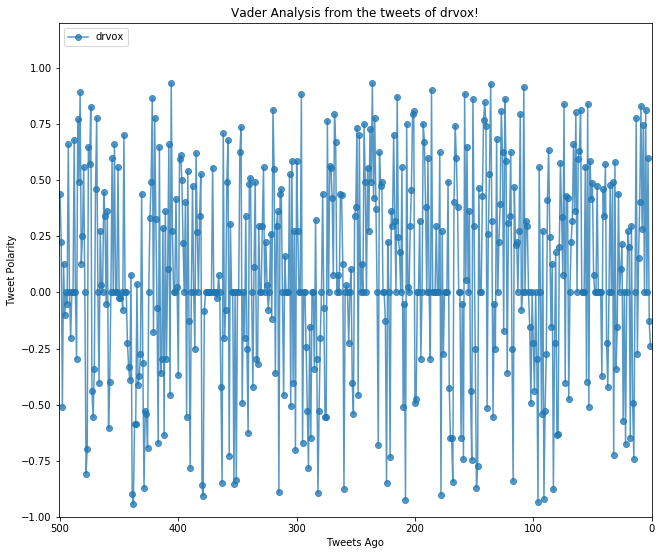

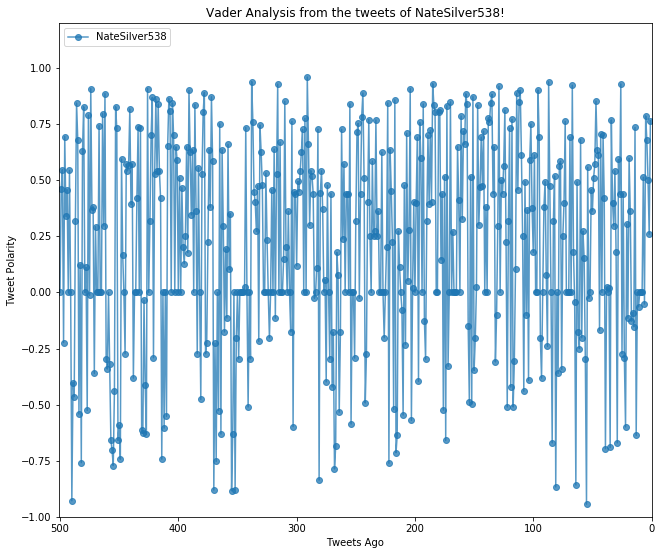

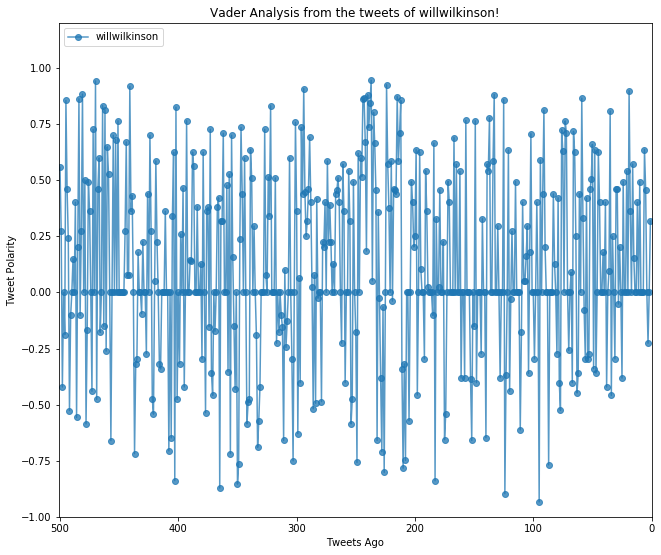

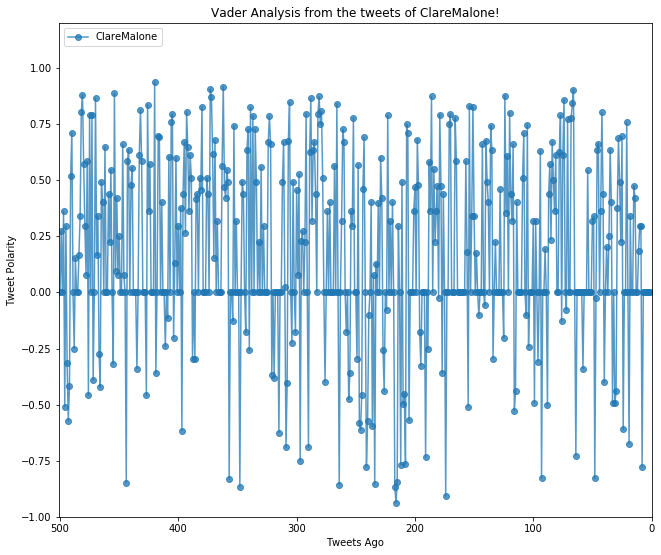

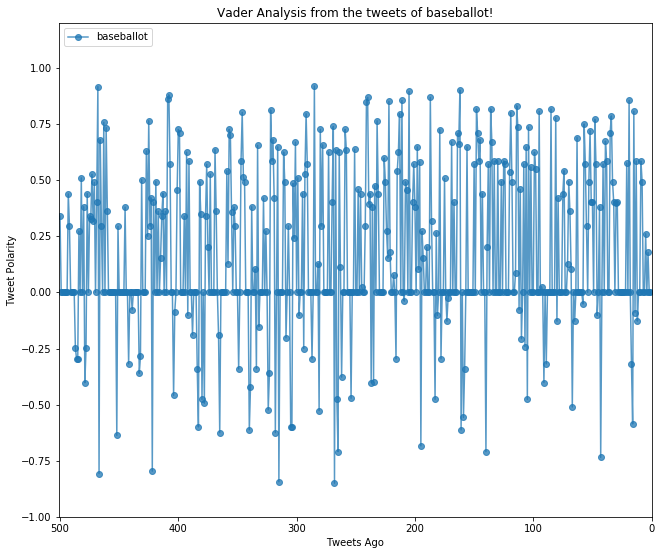

In [16]:
while(True):
    GetTweets()
    time.sleep(300)